In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv("WDIData_T.csv") 

In [56]:
labels = ['CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)' ]

labels_code = [
'CO2_EM_TOTAL',
'CO2_EM_PC']

features = ['Access to electricity (% of population)',
 'Access to electricity, urban (% of urban population)',
 'Alternative and nuclear energy (% of total energy use) ',
 'Combustible renewables and waste (% of total energy)',
 'CO2 emissions from electricity and heat production, total (% of total fuel combustion)',
 'CO2 emissions from gaseous fuel consumption (kt)',
 'CO2 emissions from liquid fuel consumption (kt)',
 'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)',
 'CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)',
 'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)',
 'CO2 emissions from solid fuel consumption (kt)',
 'CO2 emissions from transport (% of total fuel combustion)',
 'Electricity production from coal sources (% of total)',
 'Electricity production from hydroelectric sources (% of total)',
 'Electricity production from natural gas sources (% of total)',
 'Fossil fuel energy consumption (% of total) GDP growth (annual %)',
 'GDP per capita (current US$)',
'Population growth (annual %)',
 'Population, total Rural land area (sq. km)',
 'SF6 gas emissions (thousand metric tons of CO2 equivalent)',
 'Electricity production from nuclear sources (% of total)',
 'Electricity production from oil sources (% of total)',
 'Electricity production from renewable sources, excluding hydroelectric (% of total)',
 'Forest area (% of land area)',
 'Methane emissions (kt of CO2 equivalent)',
 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
 'Population in urban agglomerations of more than 1 million (% of total population)',
 'Total greenhouse gas emissions (kt of CO2 equivalent)',
 'Urban population (% of total population)',
 'Urban population growth (annual %)'
]

features_code = [
'ELECTRICITY_ACCESS_TOTAL',
'ELECTRICITY_ACCESS_URBAN',
'ALT_NUCL_EN',
'REN_WASTE',
'CO2_EM_ELEC_HEAT',
'CO2_EM_GAS_FUEL',
'CO2_EM_LIQUID_FUEL',
'CO2_EM_MAN_IND_CON',
'CO2_EM_OTHER',
'CO2_EM_RES_PUBLIC',
'CO2_EM_SOLID_FUEL',
'CO2_EM_TRANSPORT',
'ELEC_PROD_COAL',
'ELEC_PROD_HYDRO',
'ELEC_PROD_NAT_GAS',
'FOSSIL_FUEL_CONS',
'GDP_PC',
'POP_GROWTH',
'POP_RURAL_TOTAL',
'SF6_EMISSION',
'ELEC_PROD_NUCL',
'ELEC_PROD_OIL',
'ELEC_PROD_RENW',
'FOREST_AREA',
'METHANE_EM',
'NO2_EM',
'POP_URBAN_AGG',
'GREENHOUSE_EM',
'URBAN_POP_TOTAL',
'URBAN_POP_GROWTH'
]
countries = ['CHI','USA', 'GBR', 'FRA', 'BGD']

In [4]:
len(features), len(features_code)

(30, 30)

In [57]:
filter_by = np.concatenate([labels,features])

In [58]:
data = df[df['IndicatorName'].isin(filter_by)].loc[(df['Year'] >= 1990)]
data

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2294956,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1990,654823.524000
2294957,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,2.941000
2294958,Arab World,ARB,CO2 emissions from electricity and heat produc...,EN.CO2.ETOT.ZS,1990,42.763477
2294960,Arab World,ARB,CO2 emissions from gaseous fuel consumption (kt),EN.ATM.CO2E.GF.KT,1990,238688.648212
2294962,Arab World,ARB,CO2 emissions from liquid fuel consumption (kt),EN.ATM.CO2E.LF.KT,1990,348020.302000
...,...,...,...,...,...,...
7564519,Zimbabwe,ZWE,GDP per capita (current US$),NY.GDP.PCAP.CD,2019,1463.985910
7564673,Zimbabwe,ZWE,Population growth (annual %),SP.POP.GROW,2019,1.419681
7564677,Zimbabwe,ZWE,Population in urban agglomerations of more tha...,EN.URB.MCTY.TL.ZS,2019,10.387589
7564779,Zimbabwe,ZWE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2019,32.210000


In [59]:
data = data.loc[(data['CountryCode'].isin(countries))]
data

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2324261,Bangladesh,BGD,CO2 emissions (kt),EN.ATM.CO2E.KT,1990,14161.954000
2324262,Bangladesh,BGD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,0.137266
2324263,Bangladesh,BGD,CO2 emissions from electricity and heat produc...,EN.CO2.ETOT.ZS,1990,38.966725
2324265,Bangladesh,BGD,CO2 emissions from gaseous fuel consumption (kt),EN.ATM.CO2E.GF.KT,1990,7583.356000
2324267,Bangladesh,BGD,CO2 emissions from liquid fuel consumption (kt),EN.ATM.CO2E.LF.KT,1990,5342.819000
...,...,...,...,...,...,...
7560988,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,2019,65118.358333
7561166,United States,USA,Population growth (annual %),SP.POP.GROW,2019,0.473954
7561170,United States,USA,Population in urban agglomerations of more tha...,EN.URB.MCTY.TL.ZS,2019,46.486537
7561291,United States,USA,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2019,82.459000


In [60]:
data['IndicatorName'].value_counts()

Urban population growth (annual %)                                                                                                   150
Urban population (% of total population)                                                                                             150
Population growth (annual %)                                                                                                         150
Forest area (% of land area)                                                                                                         135
GDP per capita (current US$)                                                                                                         130
Population in urban agglomerations of more than 1 million (% of total population)                                                    120
Access to electricity, urban (% of urban population)                                                                                 115
Access to electricity (% of population)  

In [61]:
data.isnull().sum()

CountryName      0
CountryCode      0
IndicatorName    0
IndicatorCode    0
Year             0
Value            0
dtype: int64

In [62]:
data.drop(['IndicatorCode'], axis = 1, inplace = True)
data

/var/folders/kv/4pstm10x0_dftvm1l2kgqmkm0000gn/T/ipykernel_28588/3968495103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['IndicatorCode'], axis = 1, inplace = True)


,CountryName,CountryCode,IndicatorName,Year,Value
2324261,Bangladesh,BGD,CO2 emissions (kt),1990,14161.954000
2324262,Bangladesh,BGD,CO2 emissions (metric tons per capita),1990,0.137266
2324263,Bangladesh,BGD,CO2 emissions from electricity and heat produc...,1990,38.966725
2324265,Bangladesh,BGD,CO2 emissions from gaseous fuel consumption (kt),1990,7583.356000
2324267,Bangladesh,BGD,CO2 emissions from liquid fuel consumption (kt),1990,5342.819000
...,...,...,...,...,...
7560988,United States,USA,GDP per capita (current US$),2019,65118.358333
7561166,United States,USA,Population growth (annual %),2019,0.473954
7561170,United States,USA,Population in urban agglomerations of more tha...,2019,46.486537
7561291,United States,USA,Urban population (% of total population),2019,82.459000


In [63]:
data = data.reset_index(drop=True)
data

,CountryName,CountryCode,IndicatorName,Year,Value
0,Bangladesh,BGD,CO2 emissions (kt),1990,14161.954000
1,Bangladesh,BGD,CO2 emissions (metric tons per capita),1990,0.137266
2,Bangladesh,BGD,CO2 emissions from electricity and heat produc...,1990,38.966725
3,Bangladesh,BGD,CO2 emissions from gaseous fuel consumption (kt),1990,7583.356000
4,Bangladesh,BGD,CO2 emissions from liquid fuel consumption (kt),1990,5342.819000
...,...,...,...,...,...
3112,United States,USA,GDP per capita (current US$),2019,65118.358333
3113,United States,USA,Population growth (annual %),2019,0.473954
3114,United States,USA,Population in urban agglomerations of more tha...,2019,46.486537
3115,United States,USA,Urban population (% of total population),2019,82.459000


In [64]:
dictionary_features = dict(zip(features, features_code))
dictionary_labels = dict(zip(labels, labels_code))
data['IndicatorName'] = data['IndicatorName'].replace(to_replace=dictionary_features)
data['IndicatorName'] = data['IndicatorName'].replace(to_replace=dictionary_labels)
data

,CountryName,CountryCode,IndicatorName,Year,Value
0,Bangladesh,BGD,CO2_EM_TOTAL,1990,14161.954000
1,Bangladesh,BGD,CO2_EM_PC,1990,0.137266
2,Bangladesh,BGD,CO2_EM_ELEC_HEAT,1990,38.966725
3,Bangladesh,BGD,CO2_EM_GAS_FUEL,1990,7583.356000
4,Bangladesh,BGD,CO2_EM_LIQUID_FUEL,1990,5342.819000
...,...,...,...,...,...
3112,United States,USA,GDP_PC,2019,65118.358333
3113,United States,USA,POP_GROWTH,2019,0.473954
3114,United States,USA,POP_URBAN_AGG,2019,46.486537
3115,United States,USA,URBAN_POP_TOTAL,2019,82.459000


In [65]:
data.drop(['CountryName'], axis = 1, inplace = True)
data

,CountryCode,IndicatorName,Year,Value
0,BGD,CO2_EM_TOTAL,1990,14161.954000
1,BGD,CO2_EM_PC,1990,0.137266
2,BGD,CO2_EM_ELEC_HEAT,1990,38.966725
3,BGD,CO2_EM_GAS_FUEL,1990,7583.356000
4,BGD,CO2_EM_LIQUID_FUEL,1990,5342.819000
...,...,...,...,...
3112,USA,GDP_PC,2019,65118.358333
3113,USA,POP_GROWTH,2019,0.473954
3114,USA,POP_URBAN_AGG,2019,46.486537
3115,USA,URBAN_POP_TOTAL,2019,82.459000


In [66]:
#data_train = data.pivot_table( 'Value', ['CountryCode', 'Year'], 'IndicatorName' )

data_train = pd.pivot_table(data, values = 'Value', index=['CountryCode','Year'], columns = 'IndicatorName').reset_index()

data_train

IndicatorName,CountryCode,Year,CO2_EM_ELEC_HEAT,CO2_EM_GAS_FUEL,CO2_EM_LIQUID_FUEL,CO2_EM_MAN_IND_CON,CO2_EM_OTHER,CO2_EM_PC,CO2_EM_RES_PUBLIC,CO2_EM_SOLID_FUEL,...,GDP_PC,GREENHOUSE_EM,METHANE_EM,NO2_EM,POP_GROWTH,POP_URBAN_AGG,REN_WASTE,SF6_EMISSION,URBAN_POP_GROWTH,URBAN_POP_TOTAL
0,BGD,1990,38.966725,7583.356,5342.819,20.227671,6.830123,0.137266,19.352014,1070.764,...,306.268704,126701.696,87092.7,16201.406,2.429599,8.377782,53.125136,0.0,4.887500,19.811
1,BGD,1991,42.790698,9064.824,5269.479,14.046512,8.093023,0.140257,18.046512,341.031,...,293.160416,126700.013,85947.7,18157.723,2.325303,8.667986,53.899068,NaN,4.551611,20.257
2,BGD,1992,44.293015,9614.874,5379.489,12.691652,8.517888,0.143102,16.524702,322.696,...,293.644998,128626.244,86069.7,18749.854,2.233022,8.857439,51.853049,NaN,3.960619,20.610
3,BGD,1993,46.277022,10399.612,5482.165,11.689351,7.926341,0.146247,16.653323,121.011,...,300.555753,128901.676,84822.6,19595.286,2.168260,9.055898,49.478661,NaN,3.880830,20.966
4,BGD,1994,45.285820,11481.377,5896.536,14.105419,7.349666,0.156291,16.926503,99.009,...,299.533040,131295.609,84986.0,20548.319,2.140081,9.262073,48.353938,NaN,3.851949,21.328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,USA,2015,NaN,1484155.911,2132547.517,NaN,NaN,15.989866,NaN,1452832.397,...,56822.518820,NaN,NaN,NaN,0.730641,45.509704,3.621035,NaN,0.961099,81.671
146,USA,2016,NaN,1498556.220,2127054.351,NaN,NaN,15.502204,NaN,1323423.967,...,57927.516852,NaN,NaN,NaN,0.716669,45.731720,NaN,NaN,0.950262,81.862
147,USA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59957.725851,NaN,NaN,NaN,0.631008,45.999937,NaN,NaN,0.870149,82.058
148,USA,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62840.020239,NaN,NaN,NaN,0.522337,46.325886,NaN,NaN,0.763339,82.256


In [67]:
data_train.isnull().sum()

IndicatorName
CountryCode                   0
Year                          0
CO2_EM_ELEC_HEAT             50
CO2_EM_GAS_FUEL              44
CO2_EM_LIQUID_FUEL           44
CO2_EM_MAN_IND_CON           50
CO2_EM_OTHER                 50
CO2_EM_PC                    44
CO2_EM_RES_PUBLIC            50
CO2_EM_SOLID_FUEL            44
CO2_EM_TOTAL                 44
CO2_EM_TRANSPORT             50
ELECTRICITY_ACCESS_TOTAL     35
ELECTRICITY_ACCESS_URBAN     35
ELEC_PROD_COAL               46
ELEC_PROD_HYDRO              46
ELEC_PROD_NAT_GAS            46
ELEC_PROD_NUCL               47
ELEC_PROD_OIL                46
ELEC_PROD_RENW               46
FOREST_AREA                  15
GDP_PC                       20
GREENHOUSE_EM                58
METHANE_EM                   58
NO2_EM                       58
POP_GROWTH                    0
POP_URBAN_AGG                30
REN_WASTE                    47
SF6_EMISSION                130
URBAN_POP_GROWTH              0
URBAN_POP_TOTAL           

In [86]:
data_train = data_train[(data_train['Year'] >= 1990) & (data_train['Year'] <= 2015)]
data_train

IndicatorName,CountryCode,Year,CO2_EM_ELEC_HEAT,CO2_EM_GAS_FUEL,CO2_EM_LIQUID_FUEL,CO2_EM_MAN_IND_CON,CO2_EM_OTHER,CO2_EM_PC,CO2_EM_RES_PUBLIC,CO2_EM_SOLID_FUEL,...,GDP_PC,GREENHOUSE_EM,METHANE_EM,NO2_EM,POP_GROWTH,POP_URBAN_AGG,REN_WASTE,SF6_EMISSION,URBAN_POP_GROWTH,URBAN_POP_TOTAL
0,BGD,1990,38.966725,7583.356,5342.819,20.227671,6.830123,0.137266,19.352014,1070.764,...,306.268704,1.267017e+05,87092.7000,16201.4060,2.429599,8.377782,53.125136,0.0,4.887500,19.811
1,BGD,1991,42.790698,9064.824,5269.479,14.046512,8.093023,0.140257,18.046512,341.031,...,293.160416,1.267000e+05,85947.7000,18157.7230,2.325303,8.667986,53.899068,NaN,4.551611,20.257
2,BGD,1992,44.293015,9614.874,5379.489,12.691652,8.517888,0.143102,16.524702,322.696,...,293.644998,1.286262e+05,86069.7000,18749.8540,2.233022,8.857439,51.853049,NaN,3.960619,20.610
3,BGD,1993,46.277022,10399.612,5482.165,11.689351,7.926341,0.146247,16.653323,121.011,...,300.555753,1.289017e+05,84822.6000,19595.2860,2.168260,9.055898,49.478661,NaN,3.880830,20.966
4,BGD,1994,45.285820,11481.377,5896.536,14.105419,7.349666,0.156291,16.926503,99.009,...,299.533040,1.312956e+05,84986.0000,20548.3190,2.140081,9.262073,48.353938,NaN,3.851949,21.328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,USA,2011,48.227431,1304065.874,2091649.466,8.901610,0.894824,16.915202,10.230125,1828806.240,...,49886.818109,6.571654e+06,514948.8225,296743.5475,0.720018,44.691997,3.298445,NaN,0.932736,80.944
142,USA,2012,46.952348,1365136.092,2041968.950,8.778335,0.931776,16.193429,9.712099,1626050.476,...,51610.605278,6.343841e+06,499809.3450,288877.9950,0.727269,44.883580,3.560647,NaN,0.943235,81.119
143,USA,2013,46.630820,1392202.219,2073013.772,8.635025,0.971749,16.362224,10.679440,1652500.547,...,53117.667831,NaN,NaN,NaN,0.686773,45.098137,3.672008,NaN,0.908423,81.299
144,USA,2014,45.990406,1440397.600,2077395.837,8.655561,0.943934,16.416576,11.011918,1650322.349,...,55047.725560,NaN,NaN,NaN,0.727518,45.301413,3.690067,NaN,0.953587,81.483


In [74]:
all_vars_clean = data_train

#define an array with the unique year values
years_count_missing = dict.fromkeys(all_vars_clean['Year'].unique(), 0)
for ind, row in all_vars_clean.iterrows():
    years_count_missing[row['Year']] += row.isnull().sum()

# sort the years by missing values
years_missing_sorted = dict(sorted(years_count_missing.items(), key=lambda item: item[1]))

# print the missing values for each year
print("missing values by year:")
for key, val in years_missing_sorted.items():
    print(key, ":", val)

missing values by year:
2000 : 24
2005 : 24
2008 : 25
2010 : 25
1990 : 27
1998 : 28
1999 : 28
2001 : 28
2002 : 28
2003 : 28
2004 : 28
2006 : 28
2007 : 28
1991 : 29
1992 : 29
1993 : 29
1994 : 29
1995 : 29
1996 : 29
1997 : 29
2009 : 29
2011 : 29
2012 : 29
2013 : 41
2014 : 41
2015 : 68


In [75]:
# check the amount of missing values by country

# define an array with the unique country values
countries_count_missing = dict.fromkeys(data_train['CountryCode'].unique(), 0)

# iterate through all rows and count the amount of NaN values for each country
for ind, row in data_train.iterrows():
    countries_count_missing[row['CountryCode']] += row.isnull().sum()

# sort the countries by missing values
countries_missing_sorted = dict(sorted(countries_count_missing.items(), key=lambda item: item[1]))

# print the missing values for each country
print("missing values by country:")
for key, val in countries_missing_sorted.items():
    print(key, ":", val)

missing values by country:
GBR : 35
USA : 35
BGD : 39
FRA : 40
CHI : 640


In [79]:
print("number of missing values in the whole dataset before filtering the countries:")
print(data_train.isnull().sum().sum())
print("number of rows before filtering the countries:")
print(data_train.shape[0])


# filter only rows for countries with less than 90 missing values
countries_filter = []
for key, val in countries_missing_sorted.items():
    if val<200:
        countries_filter.append(key)

data_train_1 = data_train[data_train['CountryCode'].isin(countries_filter)]

print("number of missing values in the whole dataset after filtering the countries:")
print(data_train.isnull().sum().sum())
print("number of rows after filtering the countries:")
print(data_train.shape[0])

number of missing values in the whole dataset before filtering the countries:
789
number of rows before filtering the countries:
130
number of missing values in the whole dataset after filtering the countries:
789
number of rows after filtering the countries:
130


In [80]:
data_train_1.isnull().sum()

IndicatorName
CountryCode                  0
Year                         0
CO2_EM_ELEC_HEAT             4
CO2_EM_GAS_FUEL              1
CO2_EM_LIQUID_FUEL           1
CO2_EM_MAN_IND_CON           4
CO2_EM_OTHER                 4
CO2_EM_PC                    1
CO2_EM_RES_PUBLIC            4
CO2_EM_SOLID_FUEL            1
CO2_EM_TOTAL                 1
CO2_EM_TRANSPORT             4
ELECTRICITY_ACCESS_TOTAL     1
ELECTRICITY_ACCESS_URBAN     1
ELEC_PROD_COAL               0
ELEC_PROD_HYDRO              0
ELEC_PROD_NAT_GAS            0
ELEC_PROD_NUCL               1
ELEC_PROD_OIL                0
ELEC_PROD_RENW               0
FOREST_AREA                  0
GDP_PC                       0
GREENHOUSE_EM               12
METHANE_EM                  12
NO2_EM                      12
POP_GROWTH                   0
POP_URBAN_AGG                0
REN_WASTE                    1
SF6_EMISSION                84
URBAN_POP_GROWTH             0
URBAN_POP_TOTAL              0
dtype: int64

In [81]:
data_train_1.describe()

IndicatorName,Year,CO2_EM_ELEC_HEAT,CO2_EM_GAS_FUEL,CO2_EM_LIQUID_FUEL,CO2_EM_MAN_IND_CON,CO2_EM_OTHER,CO2_EM_PC,CO2_EM_RES_PUBLIC,CO2_EM_SOLID_FUEL,CO2_EM_TOTAL,...,GDP_PC,GREENHOUSE_EM,METHANE_EM,NO2_EM,POP_GROWTH,POP_URBAN_AGG,REN_WASTE,SF6_EMISSION,URBAN_POP_GROWTH,URBAN_POP_TOTAL
count,104.00000,100.000000,1.030000e+02,1.030000e+02,100.000000,100.000000,103.000000,100.000000,1.030000e+02,1.030000e+02,...,104.000000,9.200000e+01,92.000000,92.000000,104.000000,104.000000,103.000000,20.000000,104.000000,104.000000
mean,2002.50000,38.733984,3.735080e+05,6.554399e+05,13.704752,3.385804,8.377543,17.541022,5.314668e+05,1.578714e+06,...,26285.299447,2.012263e+06,206273.675376,110721.012604,0.933979,25.805008,11.076305,11407.530000,1.690944,65.347029
std,7.53632,12.376224,4.951324e+05,9.025411e+05,3.939110,2.514839,6.787454,5.313781,8.056953e+05,2.214792e+06,...,17370.306033,2.717011e+06,210899.380574,126782.698110,0.558693,11.816462,16.110268,18609.829095,1.337697,23.040354
min,1990.00000,13.795155,7.583356e+03,5.269479e+03,7.958991,0.753287,0.137266,9.236012,9.900900e+01,1.416195e+04,...,293.160416,1.267000e+05,58980.031224,16201.406000,0.239745,8.377782,0.142298,0.000000,0.234965,19.811000
25%,1996.00000,33.779474,5.420193e+04,8.681256e+04,9.758699,0.976114,2.546155,11.670734,2.157663e+04,1.921746e+05,...,14103.878025,4.201851e+05,83049.350000,26355.826217,0.505825,20.323225,1.520261,396.675000,0.808306,64.119000
50%,2002.50000,44.340185,1.081105e+05,2.026678e+05,13.478345,3.008837,6.497341,17.949513,9.043555e+04,4.050385e+05,...,27719.679938,5.794117e+05,89401.650000,48713.710000,0.767528,24.046916,3.301682,1292.550000,1.081825,77.938000
75%,2009.00000,47.527011,6.024808e+05,1.097896e+06,17.366836,5.631715,12.930338,21.824013,8.447576e+05,2.693839e+06,...,41525.180176,2.105389e+06,213074.336250,128890.211250,1.158388,30.442374,4.843501,12725.100000,2.280518,79.452500
max,2015.00000,52.802313,1.484156e+06,2.446413e+06,20.743849,8.517888,20.178751,26.327680,2.123574e+06,5.789727e+06,...,56822.518820,7.244272e+06,637636.000000,366029.400000,2.429599,45.509704,53.899068,45930.100000,4.887500,82.626000


In [82]:
data_train_1.head()

IndicatorName,CountryCode,Year,CO2_EM_ELEC_HEAT,CO2_EM_GAS_FUEL,CO2_EM_LIQUID_FUEL,CO2_EM_MAN_IND_CON,CO2_EM_OTHER,CO2_EM_PC,CO2_EM_RES_PUBLIC,CO2_EM_SOLID_FUEL,...,GDP_PC,GREENHOUSE_EM,METHANE_EM,NO2_EM,POP_GROWTH,POP_URBAN_AGG,REN_WASTE,SF6_EMISSION,URBAN_POP_GROWTH,URBAN_POP_TOTAL
0,BGD,1990,38.966725,7583.356,5342.819,20.227671,6.830123,0.137266,19.352014,1070.764,...,306.268704,126701.696,87092.7,16201.406,2.429599,8.377782,53.125136,0.0,4.887500,19.811
1,BGD,1991,42.790698,9064.824,5269.479,14.046512,8.093023,0.140257,18.046512,341.031,...,293.160416,126700.013,85947.7,18157.723,2.325303,8.667986,53.899068,NaN,4.551611,20.257
2,BGD,1992,44.293015,9614.874,5379.489,12.691652,8.517888,0.143102,16.524702,322.696,...,293.644998,128626.244,86069.7,18749.854,2.233022,8.857439,51.853049,NaN,3.960619,20.610
3,BGD,1993,46.277022,10399.612,5482.165,11.689351,7.926341,0.146247,16.653323,121.011,...,300.555753,128901.676,84822.6,19595.286,2.168260,9.055898,49.478661,NaN,3.880830,20.966
4,BGD,1994,45.285820,11481.377,5896.536,14.105419,7.349666,0.156291,16.926503,99.009,...,299.533040,131295.609,84986.0,20548.319,2.140081,9.262073,48.353938,NaN,3.851949,21.328


In [46]:
data_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 145
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CountryCode               104 non-null    object 
 1   Year                      104 non-null    int64  
 2   CO2_EM_ELEC_HEAT          100 non-null    float64
 3   CO2_EM_GAS_FUEL           103 non-null    float64
 4   CO2_EM_LIQUID_FUEL        103 non-null    float64
 5   CO2_EM_MAN_IND_CON        100 non-null    float64
 6   CO2_EM_OTHER              100 non-null    float64
 7   CO2_EM_PC                 103 non-null    float64
 8   CO2_EM_RES_PUBLIC         100 non-null    float64
 9   CO2_EM_SOLID_FUEL         103 non-null    float64
 10  CO2_EM_TOTAL              103 non-null    float64
 11  CO2_EM_TRANSPORT          100 non-null    float64
 12  ELECTRICITY_ACCESS_TOTAL  103 non-null    float64
 13  ELECTRICITY_ACCESS_URBAN  103 non-null    float64
 14  ELEC_PROD_

<AxesSubplot:xlabel='IndicatorName', ylabel='IndicatorName'>

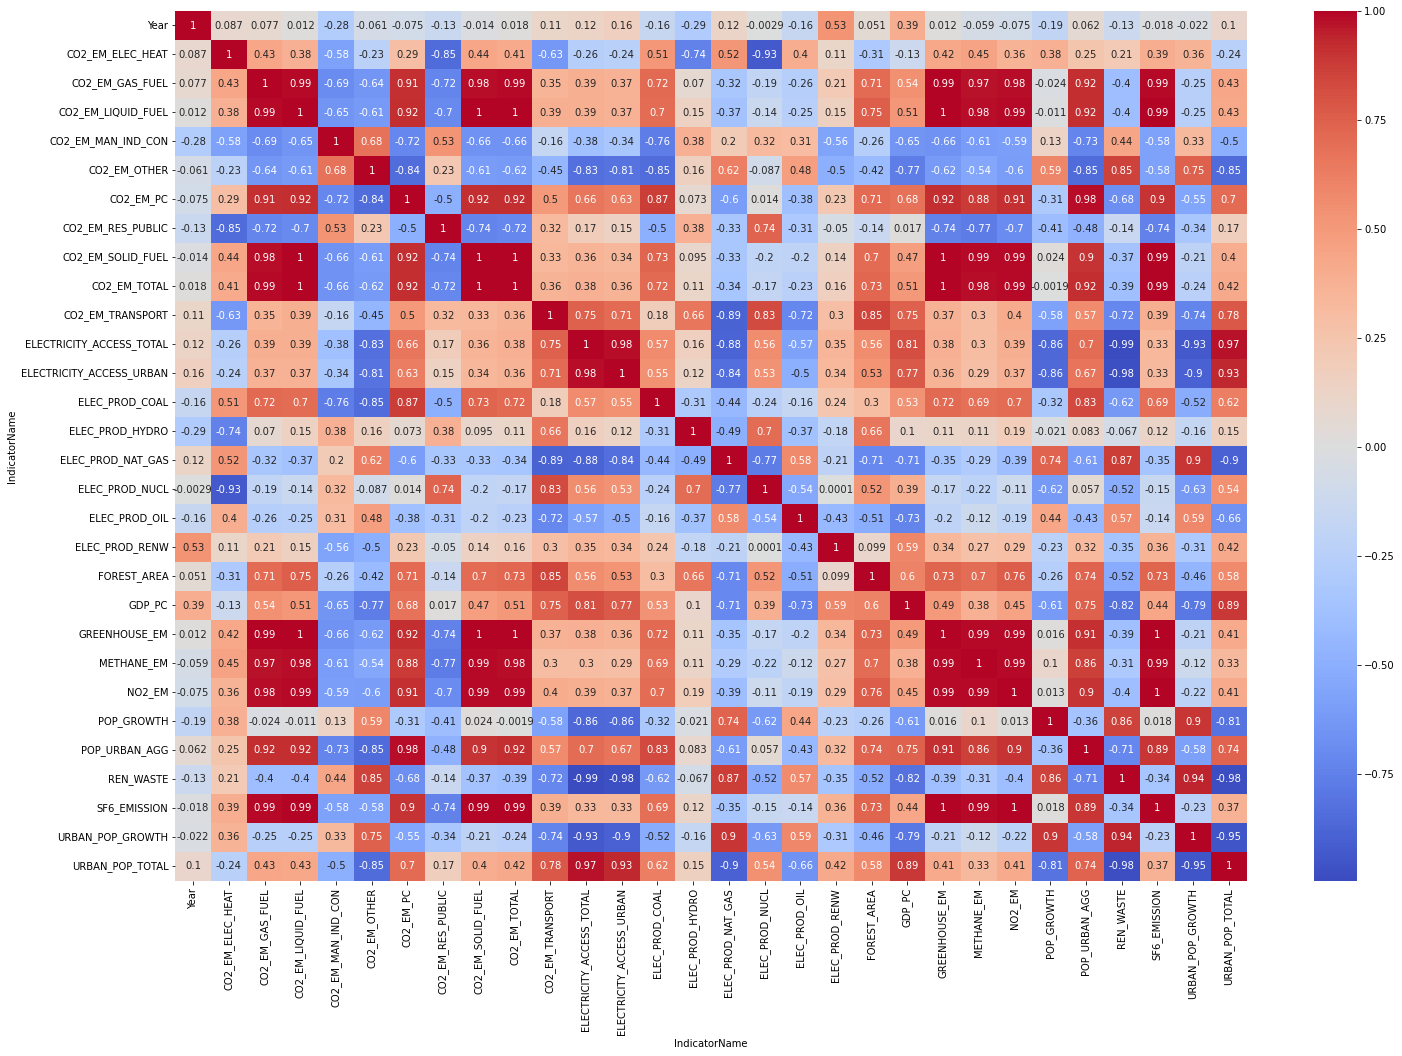

In [87]:
plt.subplots(figsize=(24,16))
sns.heatmap(data_train_1.corr(),cmap='coolwarm', annot=True)

In [100]:
# remove features with more than 20 missing values

from itertools import compress

# create a boolean mapping of features with more than 20 missing values
vars_bad = data_train_1.isnull().sum()>200

# remove the columns corresponding to the mapping of the features with many missing values
data_train_2 = data_train_1.drop(compress(data = data_train_1.columns, selectors = vars_bad), axis='columns')

print("Remaining missing values per column:")
print(data_train_2.isnull().sum())

Remaining missing values per column:
IndicatorName
CountryCode             0
Year                    0
CO2_EM_ELEC_HEAT      198
CO2_EM_GAS_FUEL        48
CO2_EM_LIQUID_FUEL     48
CO2_EM_MAN_IND_CON    198
CO2_EM_OTHER          198
CO2_EM_PC              57
CO2_EM_RES_PUBLIC     198
CO2_EM_SOLID_FUEL      48
CO2_EM_TOTAL           48
CO2_EM_TRANSPORT      198
ELEC_PROD_COAL         18
ELEC_PROD_HYDRO        18
ELEC_PROD_NAT_GAS      18
ELEC_PROD_NUCL        139
ELEC_PROD_OIL          18
ELEC_PROD_RENW         18
FOREST_AREA            75
GDP_PC                133
POP_GROWTH              9
REN_WASTE             145
URBAN_POP_GROWTH        8
URBAN_POP_TOTAL         4
dtype: int64


In [101]:
# delete rows with any number of missing values
data_train_3 = data_train_2.dropna(axis='rows', how='any')

print("Remaining missing values per column:")
print(data_train_3.isnull().sum())

print("Final shape of the cleaned dataset:")
print(data_train_3.shape)

Remaining missing values per column:
IndicatorName
CountryCode           0
Year                  0
CO2_EM_ELEC_HEAT      0
CO2_EM_GAS_FUEL       0
CO2_EM_LIQUID_FUEL    0
CO2_EM_MAN_IND_CON    0
CO2_EM_OTHER          0
CO2_EM_PC             0
CO2_EM_RES_PUBLIC     0
CO2_EM_SOLID_FUEL     0
CO2_EM_TOTAL          0
CO2_EM_TRANSPORT      0
ELEC_PROD_COAL        0
ELEC_PROD_HYDRO       0
ELEC_PROD_NAT_GAS     0
ELEC_PROD_NUCL        0
ELEC_PROD_OIL         0
ELEC_PROD_RENW        0
FOREST_AREA           0
GDP_PC                0
POP_GROWTH            0
REN_WASTE             0
URBAN_POP_GROWTH      0
URBAN_POP_TOTAL       0
dtype: int64
Final shape of the cleaned dataset:
(4246, 24)


In [102]:
# export the clean dataframe to a csv file
data_train_3.to_csv('data_cleaned.csv', index=False)

In [103]:
data_train_3.shape

(4246, 24)

In [108]:
data_train_3.columns

Index(['CountryCode', 'Year', 'CO2_EM_ELEC_HEAT', 'CO2_EM_GAS_FUEL',
       'CO2_EM_LIQUID_FUEL', 'CO2_EM_MAN_IND_CON', 'CO2_EM_OTHER', 'CO2_EM_PC',
       'CO2_EM_RES_PUBLIC', 'CO2_EM_SOLID_FUEL', 'CO2_EM_TOTAL',
       'CO2_EM_TRANSPORT', 'ELEC_PROD_COAL', 'ELEC_PROD_HYDRO',
       'ELEC_PROD_NAT_GAS', 'ELEC_PROD_NUCL', 'ELEC_PROD_OIL',
       'ELEC_PROD_RENW', 'FOREST_AREA', 'GDP_PC', 'POP_GROWTH', 'REN_WASTE',
       'URBAN_POP_GROWTH', 'URBAN_POP_TOTAL'],
      dtype='object', name='IndicatorName')

In [107]:
data_train_3.shape

(4246, 24)

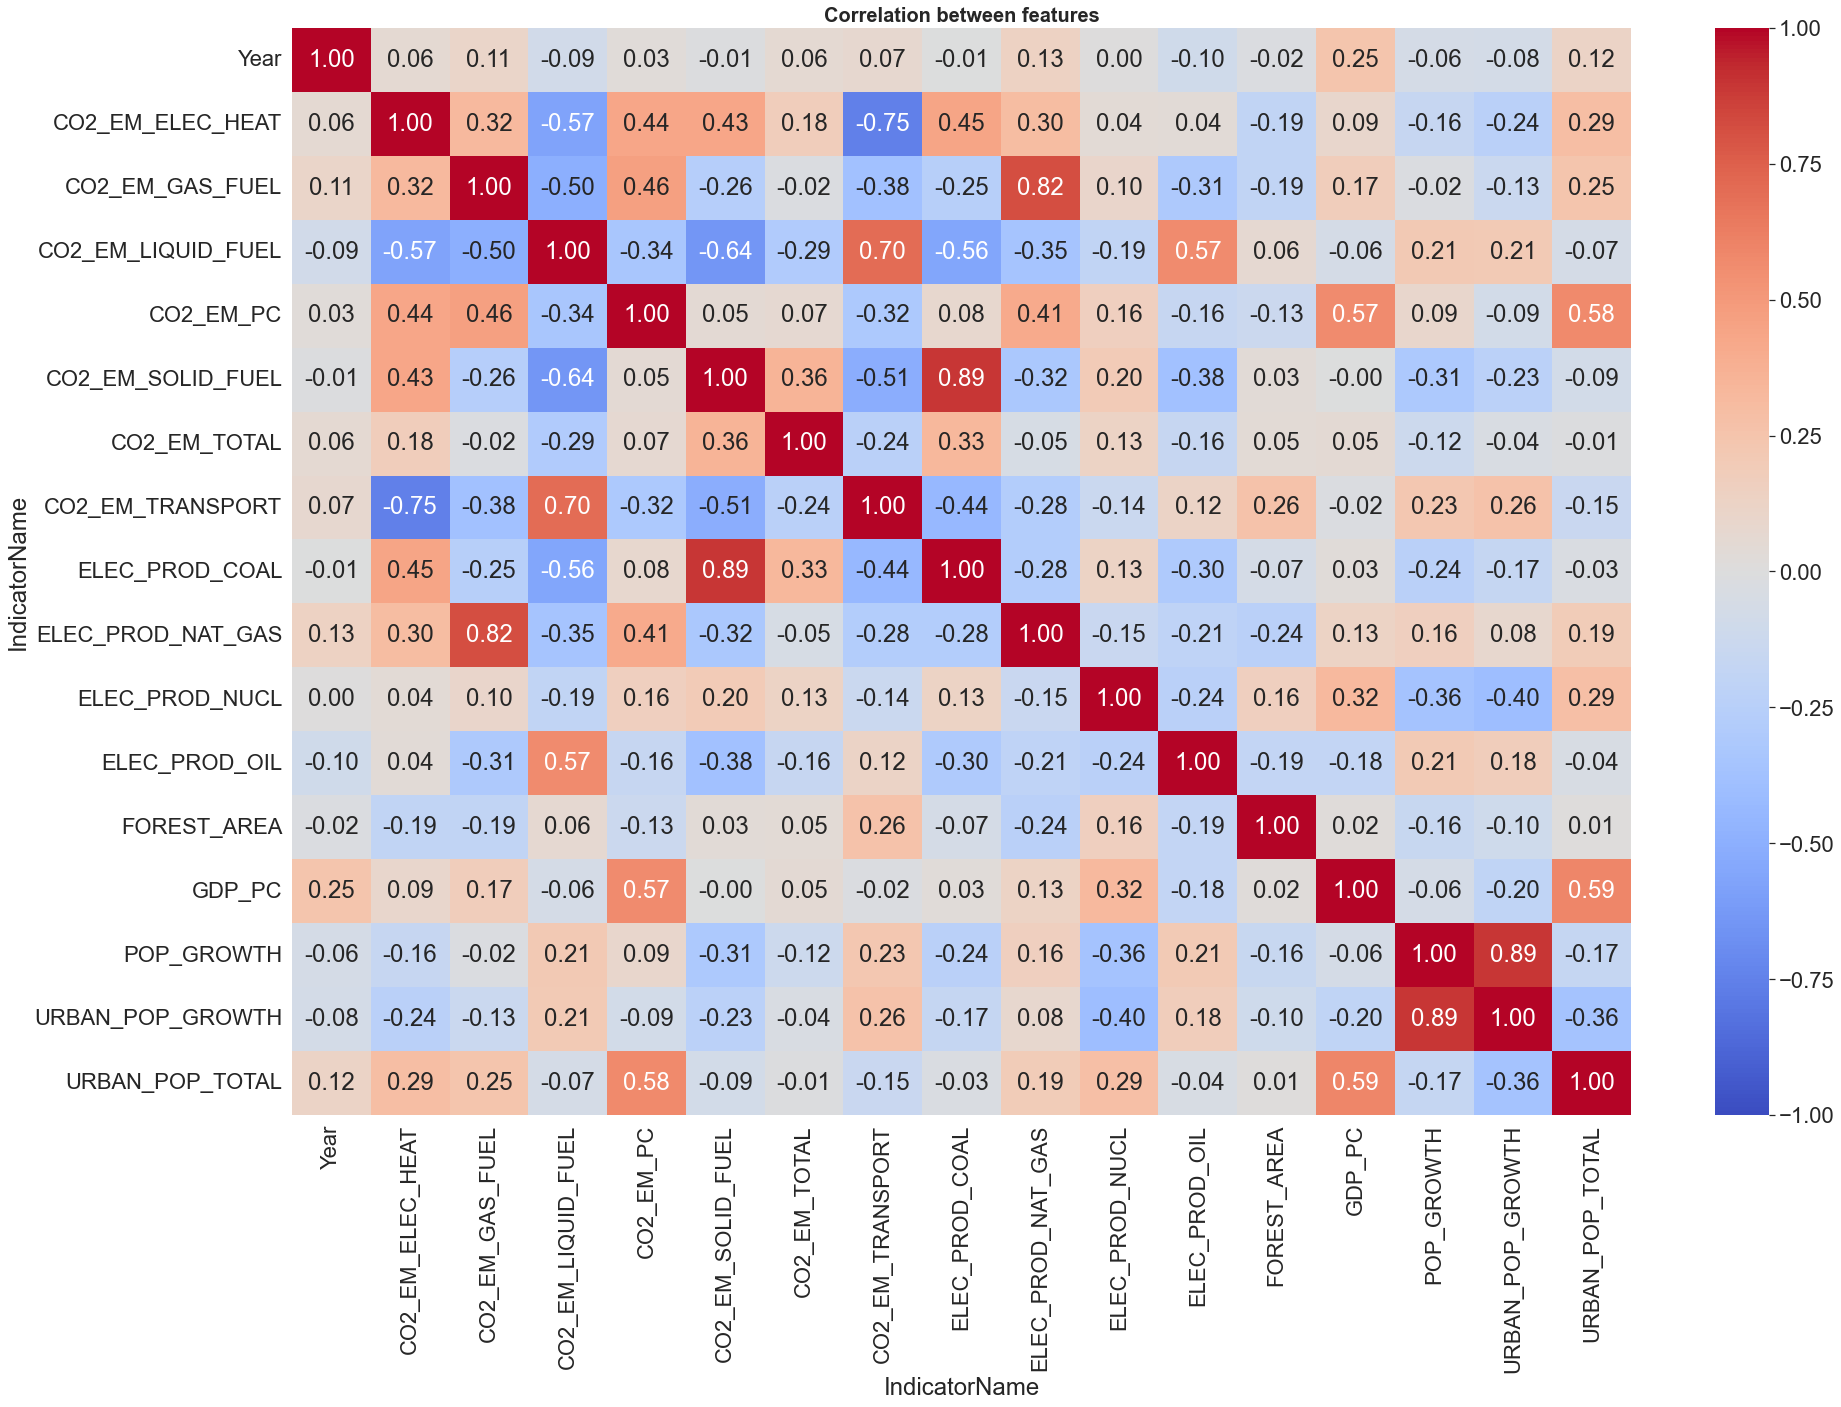

In [110]:
# select all features
features_all = data_train_3[['CountryCode', 'Year', 'CO2_EM_ELEC_HEAT', 'CO2_EM_GAS_FUEL',
       'CO2_EM_LIQUID_FUEL','CO2_EM_PC',
      'CO2_EM_SOLID_FUEL', 'CO2_EM_TOTAL',
       'CO2_EM_TRANSPORT', 'ELEC_PROD_COAL',
       'ELEC_PROD_NAT_GAS', 'ELEC_PROD_NUCL', 'ELEC_PROD_OIL',
       'FOREST_AREA', 'GDP_PC', 'POP_GROWTH',
       'URBAN_POP_GROWTH', 'URBAN_POP_TOTAL']]

# plot a correlation of all features
# correlation matrix
sns.set(font_scale=2)
f,ax=plt.subplots(figsize=(30,20))
sns.heatmap(features_all.corr(), annot=True, cmap='coolwarm', fmt = ".2f", center=0, vmin=-1, vmax=1)
plt.title('Correlation between features', fontsize=20, weight='bold' )
plt.show()

sns.set(font_scale=1)

In [115]:
# select only rows for half of the countries chosen randomly in order to ensure better visibility
chosen_countries = ['CHI','USA', 'GBR', 'FRA', 'BGD']

features_chosen = features_all[features_all['CountryCode'].isin(chosen_countries)]

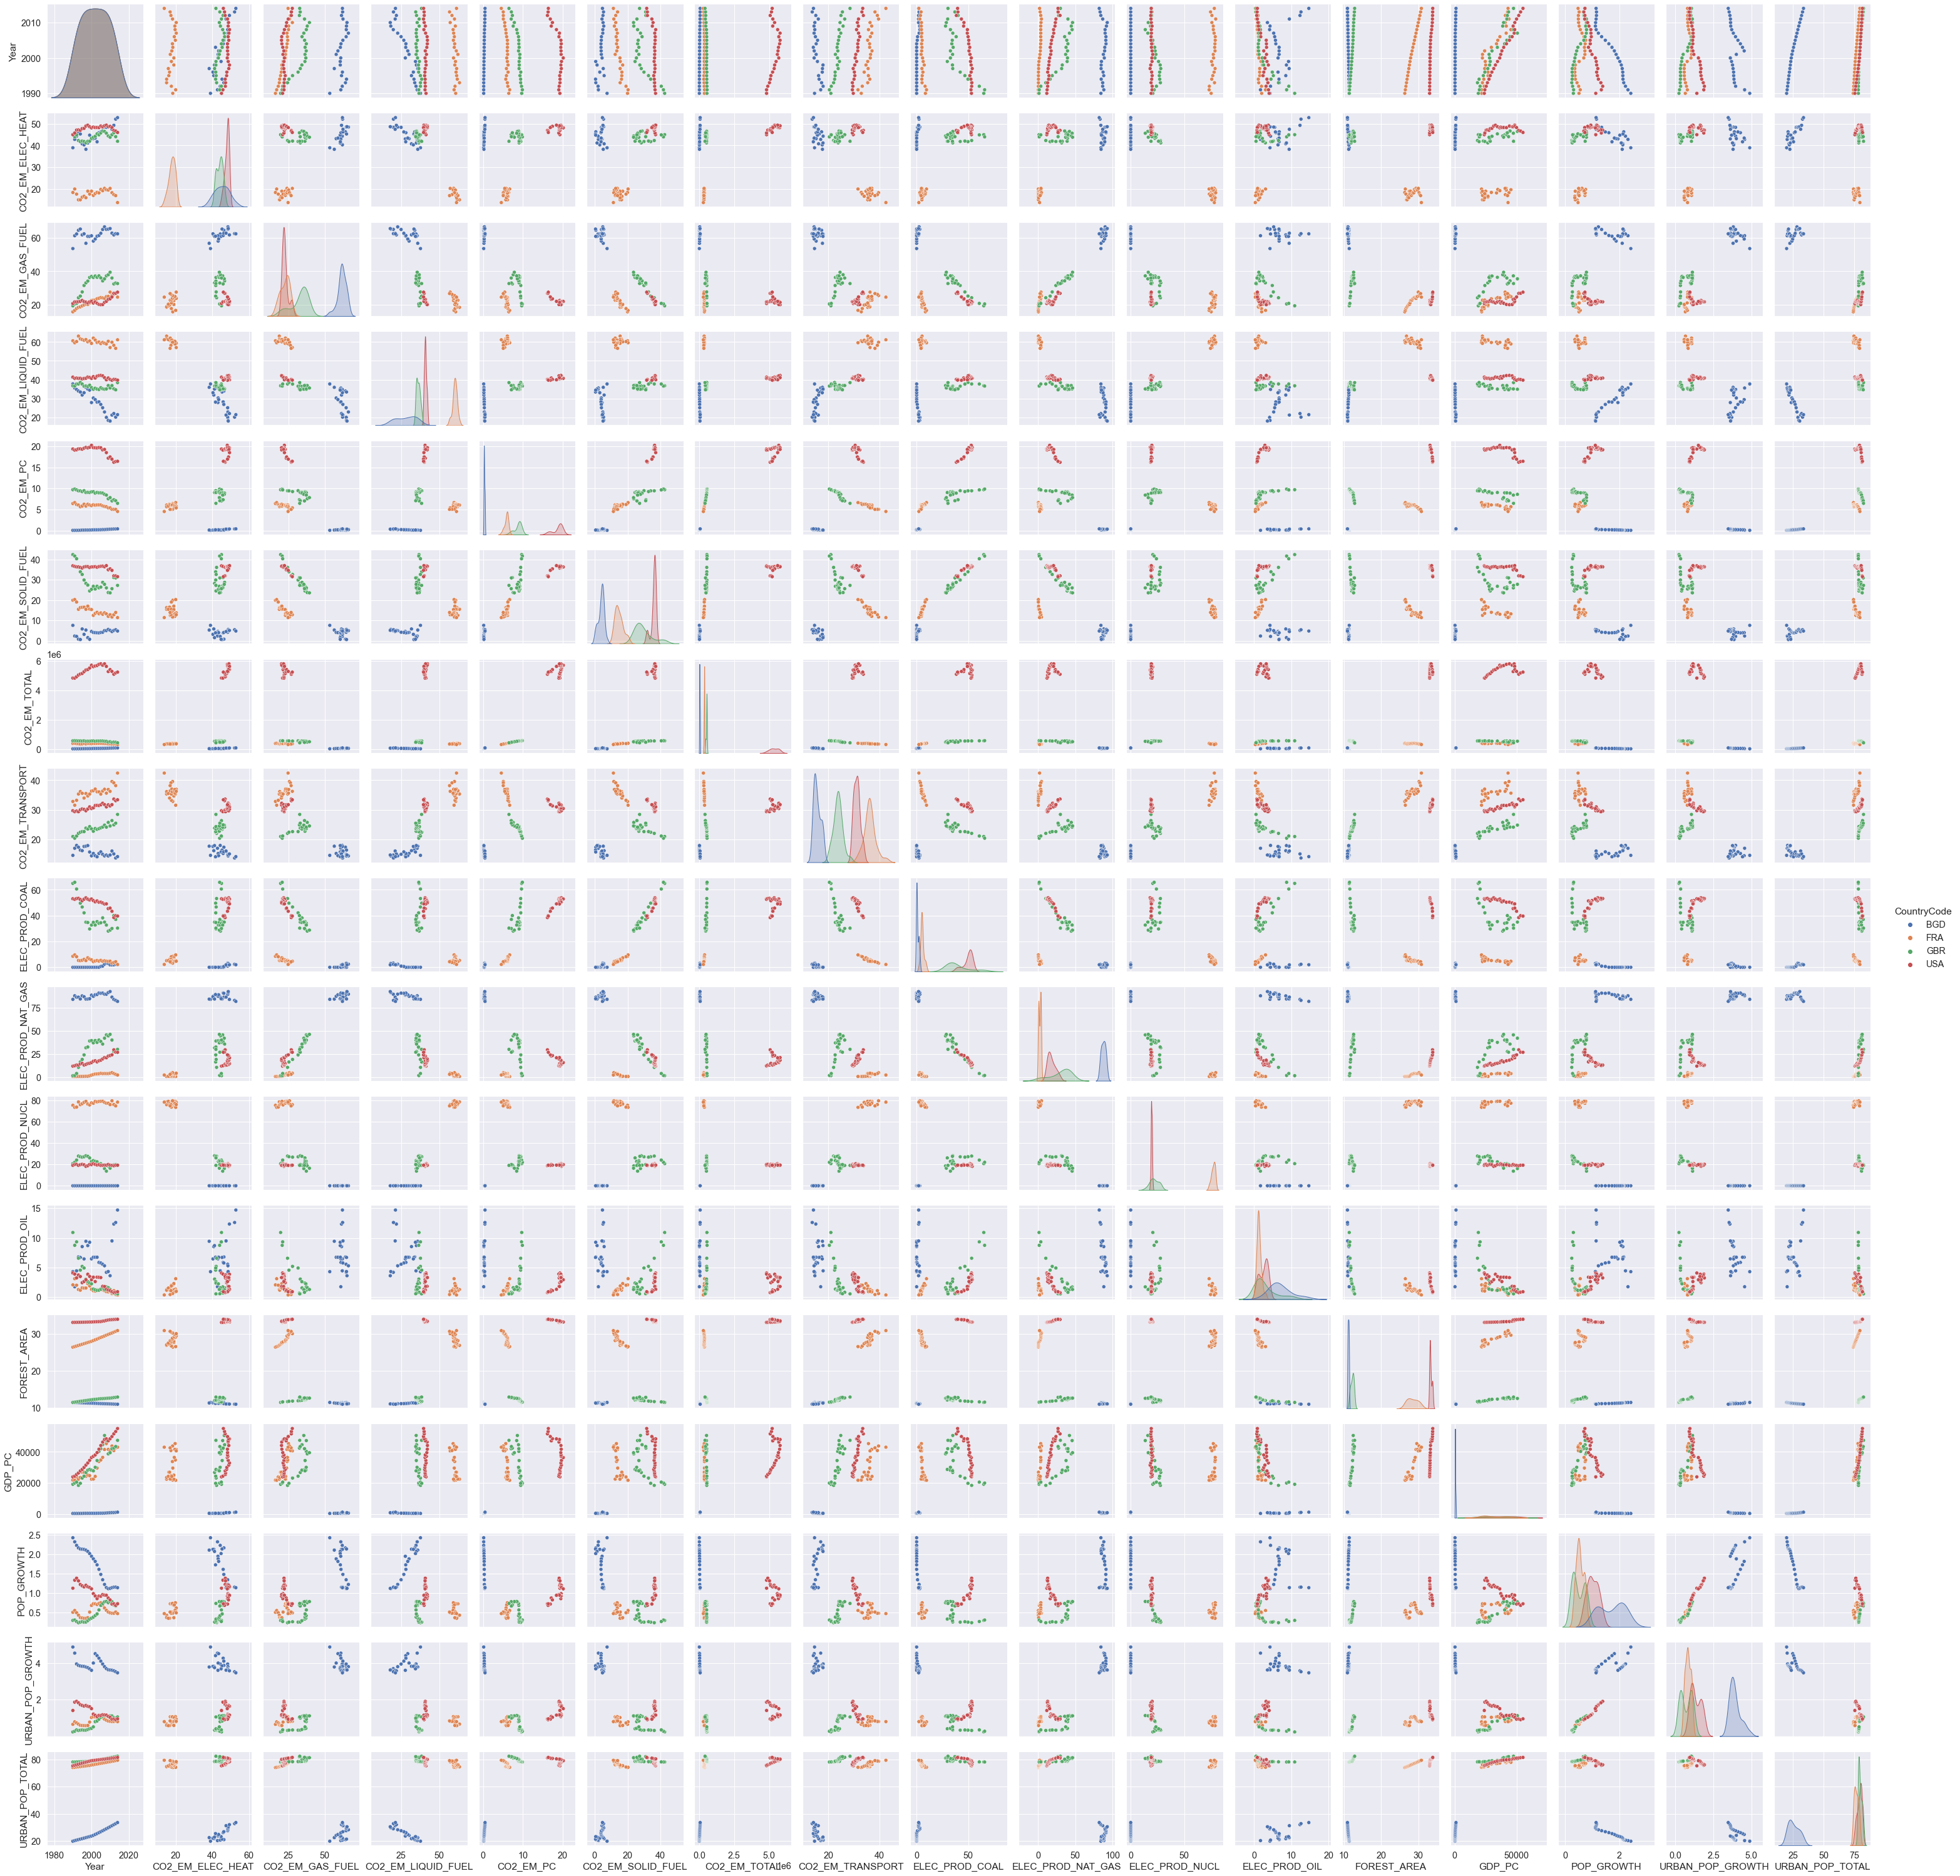

In [116]:
sns.set(font_scale=1.3)
sns.pairplot(data=features_chosen, hue='CountryCode')